# SVM

Trying to solve the problem with SVM from scikit learn.

## Loading dataset

Load the dataset from MNIST folder, and normalize the data from [0, 255] to [0, 1].

In [1]:
from idx import from_bytes


X_TRAIN_FILE_PATH = "./MNIST/x_train.idx3-ubyte"
Y_TRAIN_FILE_PATH = "./MNIST/y_train.idx1-ubyte"
X_TEST_FILE_PATH = "./MNIST/x_test.idx3-ubyte"
Y_TEST_FILE_PATH = "./MNIST/y_test.idx1-ubyte"

with open(X_TRAIN_FILE_PATH, "rb") as f:
    x = from_bytes(f.read())

with open(Y_TRAIN_FILE_PATH, "rb") as f:
    y = from_bytes(f.read())
    
with open(X_TEST_FILE_PATH, "rb") as f:
    x_test = from_bytes(f.read())
    
with open(Y_TEST_FILE_PATH, "rb") as f:
    y_test = from_bytes(f.read())
    
x = x.reshape(60000, 28 * 28) / 255.
x_test = x_test.reshape(10000, 28 * 28) / 255.

## Create and fit model

Create and fit model. Kernel is RBF, training is done with cross-validation, using (C, Γ) = (10, 10<sup>-3</sup>).

In [2]:
from sklearn import svm


model = svm.SVC(
    kernel = "rbf",
    probability = True,
    tol = 1e-3,
    C = 10
)

model.fit(x, y)

SVC(C=10, probability=True)

## Performance

Calculate accuracy and draw confusion matrix. Values in the confusion matrix are drawn following a logarithmic scale.

Model accuracy is 0.9837


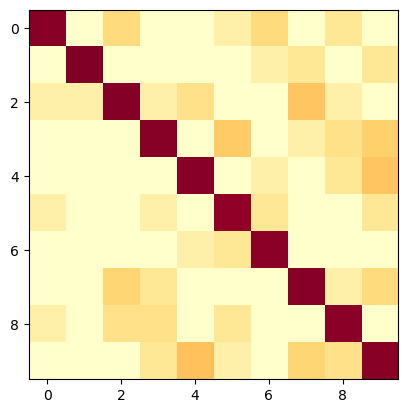

In [6]:
from math import log
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score


y_predicted = model.predict(x_test)


accuracy = accuracy_score(y_predicted, y_test)
print(f"Model accuracy is {accuracy}")


confusion_matrix = [[0 for jj in range(10)] for ii in range(10)]

for index, predicted in enumerate(y_predicted):
    confusion_matrix[predicted][y_test[index]] += 1

for predicted in confusion_matrix:
    for real_index, real in enumerate(predicted):
        predicted[real_index] = log(real) if real > 0 else 0
        
plt.imshow(confusion_matrix, cmap = "YlOrRd")
plt.show()

## References

1. Chih-Wei Hsu, Chih-Chung Chang, & Chih-Jen Lin (2003). A Practical Guide to Support Vector Classification (2016 rev.). https://www.csie.ntu.edu.tw/~cjlin/papers/guide/guide.pdf